In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import hvplot.pandas
from scipy.stats import linregress


In [56]:
formatted_landfall_df = pd.read_csv("Resources/formatted_landfall.csv")
formatted_landfall_df

,# in Season,Year,Latitude,Longitude,Max Winds (kt),Category at Landfall,Central Prssure (mb),Storm Name,Month,County,State
0,3,1983,29.1,-95.1,100,3,962,Alicia,8,Galveston,TX
1,10,1984,33.9,-78.0,95,2,979,Diana,9,Brunswick,NC
2,2,1985,32.2,-80.5,65,1,1003,Bob,7,NaN,NaN
3,4,1985,29.6,-92.7,80,1,987,Danny,8,Cameron,LA
4,5,1985,30.4,-89.2,100,3,959,Elena,9,Harrison,MS
...,...,...,...,...,...,...,...,...,...,...,...
91,9,2022,24.6,-82.9,110,3,952,Ian,9,Monroe,FL
92,9,2022,26.7,-82.2,130,4,941,Ian,9,Lee,FL
93,9,2022,26.8,-82.0,125,4,945,Ian,9,Charlotte,FL
94,9,2022,33.3,-79.2,70,1,978,Ian,9,Georgetown,SC


In [58]:
hurricane_bea_hpi_df = pd.read_csv('Output_CSVs/hurricane_bea_hpi_data.csv')
hurricane_bea_hpi_df

,# in Season,Year,Latitude,Longitude,Max Winds (kt),Category at Landfall,Central Prssure (mb),Storm Name,Month,County,...,National Jobs AC Mean,National Jobs AC Mean -1,National Jobs AC Mean +1,National Jobs AC Mean +2,National Jobs AC Mean +3,State Jobs AC Mean,State Jobs AC Mean -1,State Jobs AC Mean +1,State Jobs AC Mean +2,State Jobs AC Mean +3
0,3,1983,29.1,-95.1,100,3,962,Alicia,8,Galveston,...,1.696220,-0.126481,4.441057,2.850772,1.878807,0.073241,2.426554,4.555847,4.271439,-1.943088
1,5,1985,30.4,-89.2,100,3,959,Elena,9,Harrison,...,2.850772,4.441057,1.878807,3.008315,3.041203,4.169243,5.597101,3.582680,2.653948,2.664073
2,11,1989,32.8,-79.8,120,4,934,Hugo,9,Charleston,...,2.365933,3.041203,2.212786,0.553979,1.432790,2.493086,3.858077,2.943121,-1.357863,0.659108
3,4,1992,25.5,-80.3,145,5,922,Andrew,8,Miami-Dade,...,1.432790,0.553979,2.646477,3.333367,2.978020,1.513116,0.599037,3.548588,3.685074,3.825204
4,17,1995,30.3,-87.1,100,3,942,Opal,10,Escambia,...,2.978020,3.333367,1.979274,2.310141,2.043440,3.825204,3.685074,3.714625,3.793512,3.239556
5,6,1996,33.9,-78.0,100,3,954,Fran,9,Brunswick,...,1.979274,2.978020,2.310141,2.043440,1.571721,1.726423,3.643462,3.002345,1.779732,1.750796
6,7,1998,24.5,-81.8,90,2,981,Georges,9,Monroe,...,2.043440,2.310141,1.571721,1.768222,-0.798434,3.239556,3.793512,2.003655,2.899257,1.599120
7,7,1998,30.4,-88.9,90,2,964,Georges,9,Harrison,...,2.043440,2.310141,1.571721,1.768222,-0.798434,1.818317,1.858989,1.709210,0.523601,-1.789630
8,8,1999,33.8,-78.0,90,2,956,Floyd,9,Brunswick,...,1.571721,2.043440,1.768222,-0.798434,-0.163517,1.750796,1.779732,1.128351,-2.189951,-0.275266
9,13,2003,34.9,-76.2,90,2,957,Isabel,9,Carteret,...,0.326038,-0.163517,1.485947,1.816113,1.578675,0.057359,-0.275266,2.107865,1.922273,2.144557


In [61]:
hpi_income_df = pd.read_csv('Output_CSVs/bea_hpi_df.csv')
hpi_income_df['FIPS code'] = hpi_income_df['FIPS code'].astype(str)
hpi_income_df['FIPS code'] = hpi_income_df['FIPS code'].apply(lambda x: x.zfill(5))
hpi_income_df

,State,County,FIPS code,Year,Annual HPI Change (%),HPI,County & State,PerCapita Income,Total Jobs,Year -2,...,National Jobs AC Mean,National Jobs AC Mean -1,National Jobs AC Mean +1,National Jobs AC Mean +2,National Jobs AC Mean +3,State Jobs AC Mean,State Jobs AC Mean -1,State Jobs AC Mean +1,State Jobs AC Mean +2,State Jobs AC Mean +3
0,AK,Anchorage,02020,1983,8.11,225.95,"Anchorage Municipality, AK",46518.69,142019.0,1981.0,...,1.696220,-0.126481,4.441057,2.850772,1.878807,7.683151,12.184209,4.526859,1.687466,-3.015252
1,AL,Baldwin,01003,1983,30.91,138.04,"Baldwin, AL",8446.81,31306.0,1981.0,...,1.696220,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
2,AL,Calhoun,01015,1983,10.84,144.33,"Calhoun, AL",12193.67,56216.0,1981.0,...,1.696220,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
3,AL,Etowah,01055,1983,-7.98,104.23,"Etowah, AL",9864.43,38722.0,1981.0,...,1.696220,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
4,AL,Jefferson,01073,1983,5.35,155.91,"Jefferson, AL",76684.98,348193.0,1981.0,...,1.696220,-0.126481,4.441057,2.850772,1.878807,2.543453,-1.074323,5.399666,2.684238,2.371115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76702,WY,Sweetwater,56037,2019,1.27,544.73,"Sweetwater, WY",23698.55,27910.0,2017.0,...,-0.144803,1.107718,-2.329085,2.933449,3.581687,0.386010,0.927573,-0.934586,2.954059,2.720550
76703,WY,Teton,56039,2019,9.42,1056.36,"Teton, WY",60437.99,34013.0,2017.0,...,-0.144803,1.107718,-2.329085,2.933449,3.581687,0.386010,0.927573,-0.934586,2.954059,2.720550
76704,WY,Uinta,56041,2019,4.16,248.10,"Uinta, WY",8317.83,11852.0,2017.0,...,-0.144803,1.107718,-2.329085,2.933449,3.581687,0.386010,0.927573,-0.934586,2.954059,2.720550
76705,WY,Washakie,56043,2019,6.05,259.90,"Washakie, WY",3713.75,5087.0,2017.0,...,-0.144803,1.107718,-2.329085,2.933449,3.581687,0.386010,0.927573,-0.934586,2.954059,2.720550


In [62]:
lanfall_map = formatted_landfall_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriImagery",
    frame_width = 800,
    frame_height = 600,
    size = "Category at Landfall",
    color = "Category at Landfall",
    hover_cols=['Storm Name','Year','County'],
    scale = 5,
    coastline = '110m'
)
lanfall_map

:Overlay
   .WMTS.I      :WMTS   [Longitude,Latitude]
   .Points.I    :Points   [Longitude,Latitude]   (Category at Landfall,Storm Name,Year,County)
   .Coastline.I :Feature   [Longitude,Latitude]

<Axes: xlabel='State'>

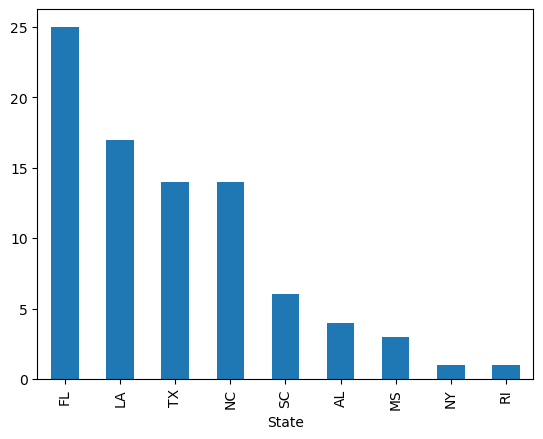

In [63]:
state_counts = formatted_landfall_df['State'].value_counts()
state_counts.plot(kind='bar')

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (9,) and arg 1 with shape (5,).

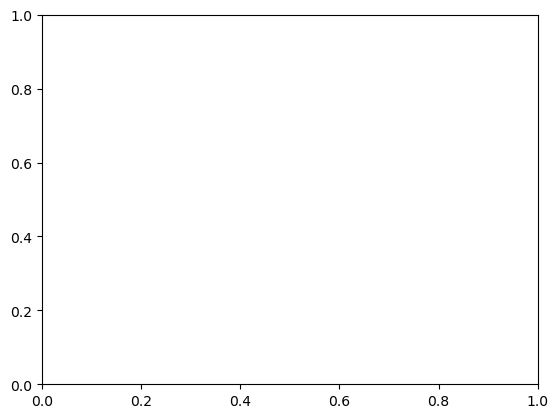

In [64]:
bars = formatted_landfall_df.groupby(formatted_landfall_df['State']).count()


x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.2, acs, 0.2, label = 'County Annual Change (%)') 
plt.bar(x_axis - 0.0, state_acs, 0.2, label = 'State Annual Change (%)') 
plt.bar(x_axis + 0.2, nat_acs, 0.2, label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 
plt.show() 

In [65]:
#Calculate mean annual HPI change for counties affect by hurricanes
prev_ac = hurricane_hpi_income_df['Annual HPI Change (%) -1'].mean().round(2)
ac = hurricane_hpi_income_df['Annual HPI Change (%)'].mean().round(2)
ac1 = hurricane_hpi_income_df['Annual HPI Change (%) +1'].mean().round(2)
ac2 = hurricane_hpi_income_df['Annual HPI Change (%) +2'].mean().round(2)
ac3 = hurricane_hpi_income_df['Annual HPI Change (%) +3'].mean().round(2)

#Calculate mean annual HPI change for the whole state
state_prev_ac = hurricane_hpi_income_df['State HPI AC Mean -1'].mean().round(2)
state_ac = hurricane_hpi_income_df['State HPI AC Mean'].mean().round(2)
state_ac1 = hurricane_hpi_income_df['State HPI AC Mean +1'].mean().round(2)
state_ac2 = hurricane_hpi_income_df['State HPI AC Mean +2'].mean().round(2)
state_ac3 = hurricane_hpi_income_df['State HPI AC Mean +3'].mean().round(2)

#Calculate mean annual HPI change for the whole nation
nat_prev_ac = hurricane_hpi_income_df['National HPI AC Mean -1'].mean().round(2)
nat_ac = hurricane_hpi_income_df['National HPI AC Mean'].mean().round(2)
nat_ac1 = hurricane_hpi_income_df['National HPI AC Mean +1'].mean().round(2)
nat_ac2 = hurricane_hpi_income_df['National HPI AC Mean +2'].mean().round(2)
nat_ac3 = hurricane_hpi_income_df['National HPI AC Mean +3'].mean().round(2)

#Print results
print('-----------------------------------------------------------------')
print('Mean HPI Change by County')
print(f'    Year -1:    {prev_ac}')
print(f'    Year of:    {ac}')
print(f'    Year +1:    {ac1}')
print(f'    Year +2:    {ac2}')
print(f'    Year +3:    {ac3}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by State')
print(f'    Year -1:    {state_prev_ac}')
print(f'    Year of:    {state_ac}')
print(f'    Year +1:    {state_ac1}')
print(f'    Year +2:    {state_ac2}')
print(f'    Year +3:    {state_ac3}')
print('-----------------------------------------------------------------')
print('Mean HPI Change by Nation')
print(f'    Year -1:    {nat_prev_ac}')
print(f'    Year of:    {nat_ac}')
print(f'    Year +1:    {nat_ac1}')
print(f'    Year +2:    {nat_ac2}')
print(f'    Year +3:    {nat_ac3}')


-----------------------------------------------------------------
Mean HPI Change by County
    Year -1:    6.24
    Year of:    8.85
    Year +1:    10.72
    Year +2:    5.25
    Year +3:    0.47
-----------------------------------------------------------------
Mean HPI Change by State
    Year -1:    4.97
    Year of:    7.28
    Year +1:    7.93
    Year +2:    4.88
    Year +3:    2.19
-----------------------------------------------------------------
Mean HPI Change by Nation
    Year -1:    3.31
    Year of:    4.5
    Year +1:    4.86
    Year +2:    4.2
    Year +3:    3.34


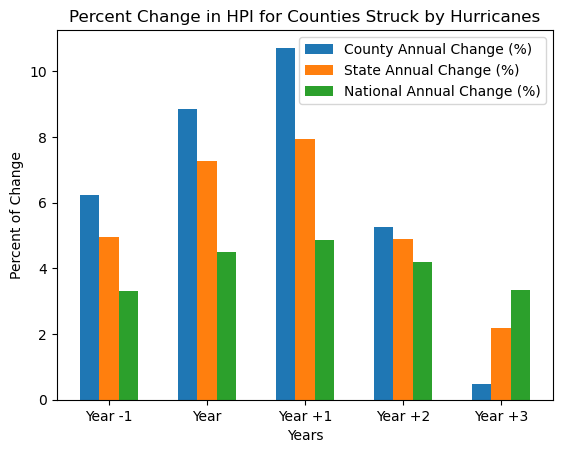

In [66]:
bars = ['Year -1','Year','Year +1','Year +2','Year +3']
acs = [prev_ac,ac,ac1,ac2,ac3]
state_acs = [state_prev_ac,state_ac,state_ac1,state_ac2,state_ac3]
nat_acs = [nat_prev_ac,nat_ac,nat_ac1,nat_ac2,nat_ac3]

x_axis = np.arange(len(bars)) 
  
plt.bar(x_axis - 0.2, acs, 0.2, label = 'County Annual Change (%)') 
plt.bar(x_axis - 0.0, state_acs, 0.2, label = 'State Annual Change (%)') 
plt.bar(x_axis + 0.2, nat_acs, 0.2, label = 'National Annual Change (%)') 
  
plt.xticks(x_axis, bars) 
plt.xlabel("Years") 
plt.ylabel("Percent of Change") 
plt.title("Percent Change in HPI for Counties Struck by Hurricanes") 
plt.legend() 
plt.show() 